DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configurations, then run the four methods ( 𝑘 -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

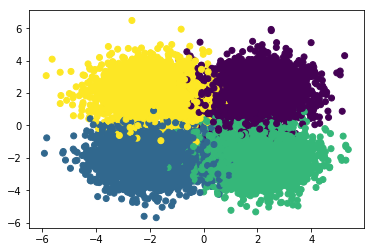

In [3]:
#Making 4 blobs
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]
# Make 10,000 rows worth of data with two features representing four
# clusters, each having a standard deviation of 1
X, y = make_blobs(
    n_samples= 10000,
    centers = centers,
    cluster_std = 1,
    n_features = 2,
    random_state = 42
)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

#Dividing the daset to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state=42)

Four Blobs: k Means

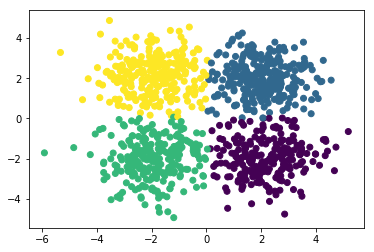

Comparing K Means cluster against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_pred = kmeans.fit_predict(X_train)

#Plot the solution
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.show()

print('Comparing K Means cluster against the data:')
print(pd.crosstab(y_pred, y_train))

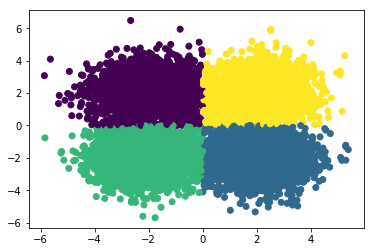

Comparing K Means Cluster againts the data
col_0     0     1     2     3
row_0                        
0        50    50     2  2149
1        53    60  2158     2
2         2  2150    52    43
3      2122     1    50    56
Centers:
[[-2.02796701  2.04169231]
 [ 2.03099082 -2.02850869]
 [-2.04274187 -2.02218817]
 [ 2.01103652  2.02772386]]


In [5]:
y_pred = kmeans.fit_predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.show()

print('Comparing K Means Cluster againts the data')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)


In [6]:
from sklearn.metrics import silhouette_score
print('Score:', silhouette_score(X_test, y_pred))

Score: 0.5205957269518988


We can see the score is 0.52 which is close to 1 which is a good sign that the clusters are configurating well.

Four blobs: Mean Shift

Number of estimated clusters: 4


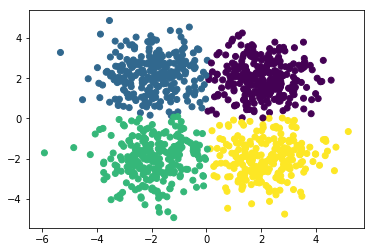

Comparing the assigned categories to the data:
col_0    0    1    2    3
row_0                    
0      260    0    3    2
1        8    5    0  240
2        0  228    9    8
3        5    6  226    0
Centers:
[[ 2.00101759  1.96957879]
 [-1.88967966  2.1194215 ]
 [-1.79761646 -1.94778711]
 [ 2.07752249 -1.93128355]]


In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the data:')
print(pd.crosstab(labels, y_train))
print('Centers:')
print(ms.cluster_centers_)

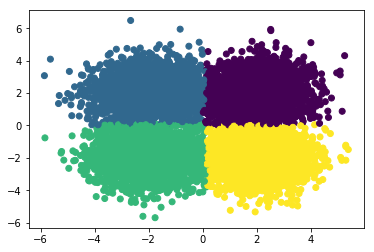

col_0     0     1     2     3
row_0                        
0      2114     0    48    48
1        56    39     1  2148
2         2  2178    73    53
3        55    44  2140     1
Score: 0.5200923073283324


In [8]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.show()

print(pd.crosstab(y_pred, y_test))
print('Score:', silhouette_score(X_test, y_pred))

With Mean Shift our code decided that the optimal K value is 4, and the Silhouette Score was of 0.52, a very good one and the same as the latter algorithm, K-means.

Four blobs: Spectral Cluster

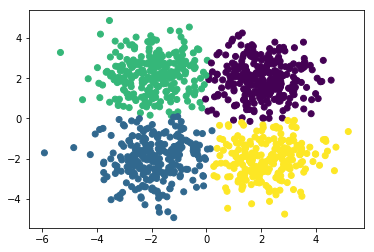

Comparing the assigned clusters to the data:
col_0    0    1    2    3
row_0                    
0      263    0    8    2
1        0  228    5    6
2        5   11    0  222
3        3    8  239    0


In [9]:
from sklearn.cluster import SpectralClustering
#We know we are looking for four clusters
n_clusters = 4
#Declare and fit the model
sc = SpectralClustering(n_clusters= n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()

print('Comparing the assigned clusters to the data:')
print(pd.crosstab(y_train, predict))

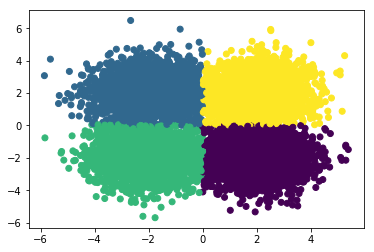

col_0     0     1     2     3
row_0                        
0        51    59  2159     2
1        52    44     2  2148
2         2  2157    52    48
3      2122     1    49    52
Accuracy: 0.5205691023952784


In [10]:
y_pred = sc.fit_predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.show()

print(pd.crosstab(y_pred, y_test))
print('Accuracy:', silhouette_score(X_test, y_pred))

Spectral Clustering has also given a good silhouette score similar to K Means and Mean Shift clustering methods

Four blobs: Affinity Propagation

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 25


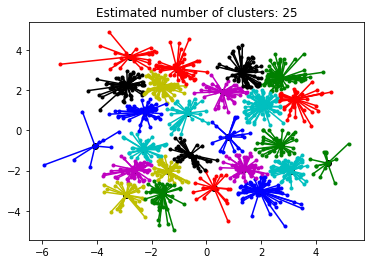

In [12]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

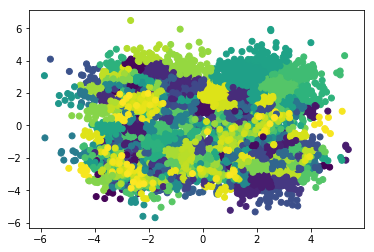

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...   1676  \
row_0                                                              ...          
0         0     0     0     0     0     0     0     0     1     0  ...      0   
1         1     0     0     0     0     0     0     0     0     0  ...      1   
2         0     0     0     0     0     0     0     1     0     0  ...      0   
3         0     1     1     1     1     5     1     0     0     1  ...      0   

col_0  1677  1678  1679  1680  1681  1682  1683  1684  1685  
row_0                                                        
0         0     0     0     0     0     0     1     0     0  
1         1     0     0     1     0     1     0     0     1  
2         0     1     0     0     0     0     0     0     0  
3         0     0     2     0     5     0     0     1     0  

[4 rows x 1686 columns]


In [13]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [14]:
print('Accuracy:', silhouette_score(X_test, y_pred))

Accuracy: 0.13598454024211695


Kmeans, mean shift and spectral clustering generated a great Silhouette score, however spectral clustering produced some outliers. Affinity propagation clustering performed well, but it generated an overdimensioned number of K clusters

Closer  Blobs

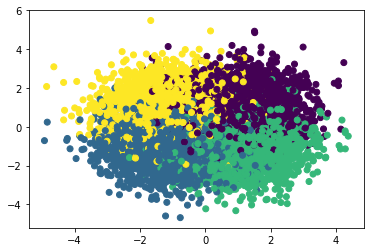

In [15]:
#Making 4 blobs
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
# Make 10,000 rows worth of data with two features representing four
# clusters, each having a standard deviation of 1
X, y = make_blobs(
    n_samples= 10000,
    centers = centers,
    cluster_std = 1,
    n_features = 2,
    random_state = 42
)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

#Dividing the daset to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state=42)

Close Blobs: KMeans

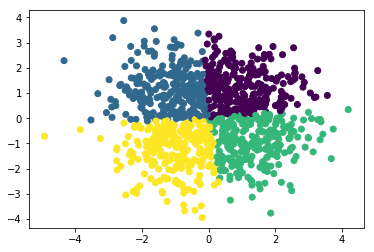

Comparing K Means cluster against the data:
col_0    0    1    2    3
row_0                    
0      191    5   20   39
1       32   35    7  179
2       43   31  176    6
3        7  168   35   26


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_pred = kmeans.fit_predict(X_train)

#Plot the solution
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.show()

print('Comparing K Means cluster against the data:')
print(pd.crosstab(y_pred, y_train))

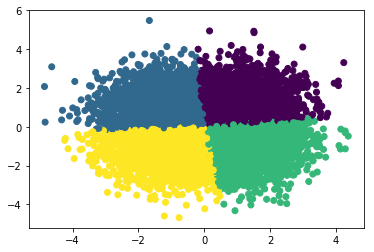

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0      1537    52   216   352
1       248   338    64  1595
2       379   238  1603    60
3        63  1633   379   243
Centers:
[[ 1.06114248  1.28791254]
 [-1.20540838  1.15734305]
 [ 1.35212971 -0.96505869]
 [-1.0350101  -1.28576302]]
Score: 0.3444421773674793


In [18]:
y_pred = kmeans.predict(X_test)
# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

print('Score:', silhouette_score(X_test, y_pred))

In [ ]:
The Silhouette score is less compared to that with little further blobs. 

In [ ]:
Close Bobs: Mean Shift

In [19]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


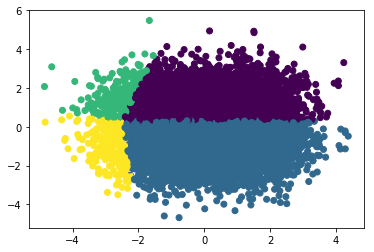

col_0     0     1     2     3
row_0                        
0      1671   196   206  1509
1       556  1843  2054   473
2         0    21     1   222
3         0   201     1    46
Score: 0.21116089561360787


In [20]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.show()

print(pd.crosstab(y_pred, y_test))
print('Score:', silhouette_score(X_test, y_pred))

The prediction seems to be increasing with mean shift. The size of the clusters seems to be reasonable.

Close blobs: Spectral Clustering

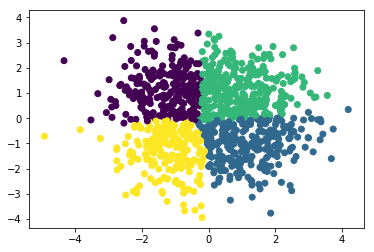

Comparing the assigned clusters to the data:
col_0    0    1    2    3
row_0                    
0       25   37  208    3
1       30   45   10  154
2        7  187   25   19
3      170    9   51   20


In [21]:
#We know we are looking for four clusters
n_clusters = 4
#Declare and fit the model
sc = SpectralClustering(n_clusters= n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()

print('Comparing the assigned clusters to the data:')
print(pd.crosstab(y_train, predict))

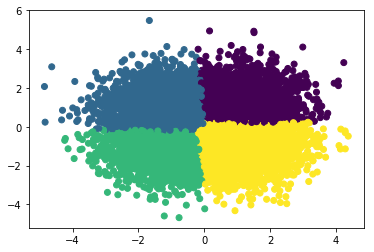

col_0     0     1     2     3
row_0                        
0      1505    38   204   314
1       273   385    72  1650
2        27  1423   205   171
3       422   415  1781   115
Accuracy: 0.3463252556525178


In [22]:
y_pred = sc.fit_predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.show()

print(pd.crosstab(y_pred, y_test))
print('Accuracy:', silhouette_score(X_test, y_pred))

In [ ]:
Close Blobs: Affinity Propagation

In [23]:
af = AffinityPropagation().fit(X_train)
print('Done')

#Pull the number of clusters and cluster assignments for each data points
cluster_centers_indices= af.cluster_centers_indices_
n_cluster = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 4


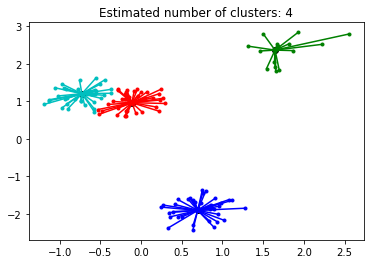

In [24]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

KMeans performed well. Spectral also perfomed well though had some outliers. Mean shift didnt perform even as good as affinity propagation. It didnt generate logical clusters.

Overall, K Means performed well in prediction however it decreased its performance when the blobs were closer.
Mean shift significantly decerased its performance when the blobs were closer.
Spectral clustering performed well, although it shows a clear dump in it's performance when the blobs were closer. We could also observe outliers.
Affinity propogation did not perform correctly however when the blobs were further apart from each other it could predict in clear groups but with too many clusters.

As a conclusion, we could mention that in all clustering algorithms, their performance works better when the blobs are further apart from each other.